# LAB 4 
# DSP
## Steven Rodríguez Mendez
## 1045506121

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
import numpy as np
import matplotlib.pyplot as plt #libreria usada para graficas
import pandas as pd #libreria para el manejo de datos
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn import linear_model
from scipy.signal import dimpulse
import math
import autocorr as ac
from scipy.optimize import fmin  #Maxios y minimos en la señal acotada
#para que la grfica se inscriste en e notbook
%matplotlib inline

## 2. Análisis de pulsos de radar

##### 1.  Genere un pulso rectangular de 20 muestras. 

In [20]:
#creando pulso rectangular de 20 muestra 
rect_pulse= np.ones(20)

##### 2. Halle y grafique la función de autocorrelación del pulso generado.

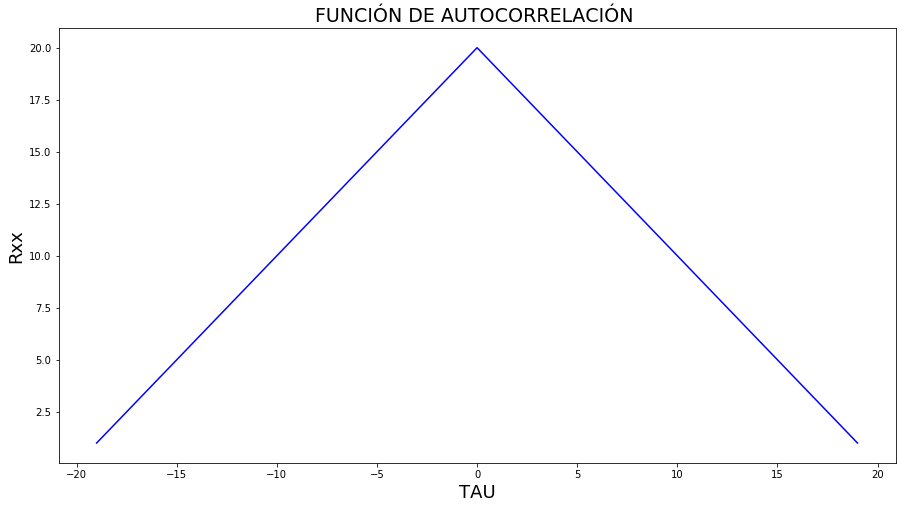

In [40]:
#Función de Autocorrelación Rxx
#vector de retraso tau
Rxx=np.correlate(rect_pulse, rect_pulse, mode='full')
tau=np.arange(-len(rect_pulse)+1,len(rect_pulse),1) 

#grafica señal autocorrelación
plt.figure(figsize=(15,8))
plt.plot(tau, Rxx, 'b')
plt.xlabel('TAU',fontsize=18)
plt.ylabel('Rxx',fontsize=18)
plt.title('FUNCIÓN DE AUTOCORRELACIÓN ', fontsize=19)
plt.show()

##### 3. ¿Qué puede decir de la función de correlación? ¿Qué puede concluir de la gráfica?

La correlación entre dos señales nos permite medir el grado de semejanza entre ambas señales. En este caso estamos comparando el pulso rectangular donde tenemos la máxima similitud en tau=0 donde no tenemos desfase; a medida que aumenta el desfase la similitud es menor.


##### 4.  Utilice la función delay noise para generar una versión retrasada y ruidosa del  pulso. 

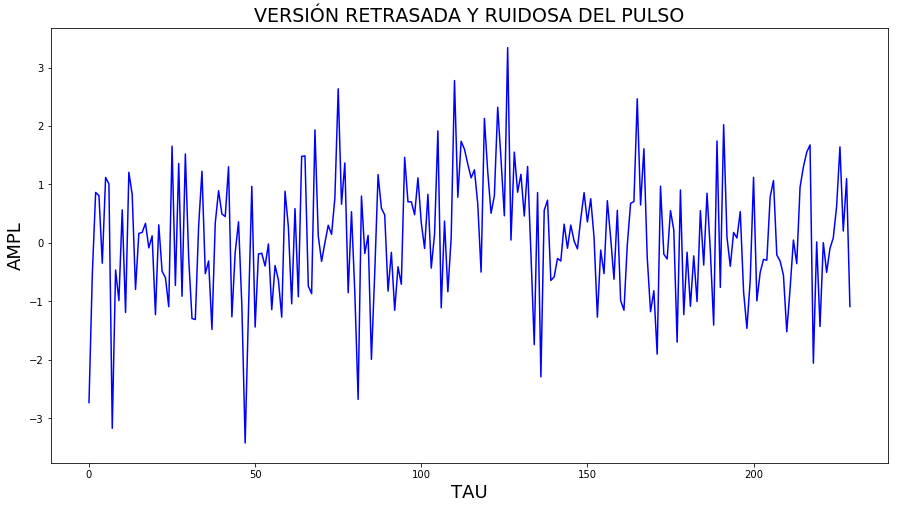

In [43]:
delayed_pulse=ac.delay_noise(rect_pulse)
plt.figure(figsize=(15,8))
plt.plot(delayed_pulse, 'b')
plt.xlabel('TAU',fontsize=18)
plt.ylabel('AMPL',fontsize=18)
plt.title('VERSIÓN RETRASADA Y RUIDOSA DEL PULSO', fontsize=19)
plt.show()

##### ¿Es capaz de distinguir el pulso y decir cuánto es su retraso?

Por medio de la gráfica no podemos distinguir el pulso, ni saber cuál es su retraso; El ruido afecta de tal manera al pulso que la señal resultante no se puede asociar a un pulso y no podemos percibir el retraso.


##### 5.  Utilice la función de numpy np.correlate para hallar la correlación entre la señal retrasada y la señal recibida. Utilice la señal resultante para determinar el retraso. Grafique la correlación.


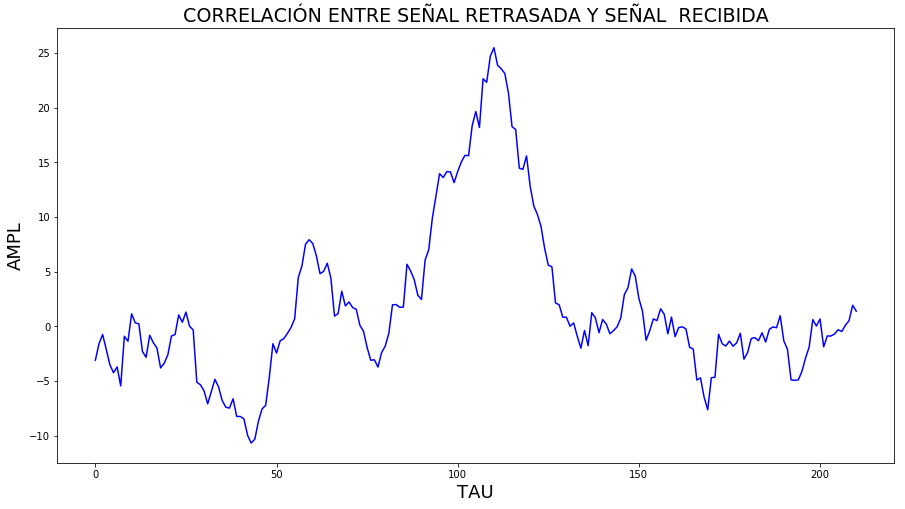

El retraso del pulso en el tiempo es:  110 s


In [44]:
xcorr=np.correlate(delayed_pulse,rect_pulse)
plt.figure(figsize=(15,8))
plt.plot(xcorr, 'b')
plt.xlabel('TAU',fontsize=18)
plt.ylabel('AMPL',fontsize=18)
plt.title('CORRELACIÓN ENTRE SEÑAL RETRASADA Y SEÑAL  RECIBIDA', fontsize=19)
plt.show()

delay = np.argmax(xcorr)
print ("El retraso del pulso en el tiempo es: ", delay,"s")

Esta nueva grafica nos permite sacar una mejor interpretación del retraso de la señal. Sin importar que le hemos agregado ruido y desfase podemos ver unos picos en la amplitud de la correlación, que nos indican que aún hay similitud con la señal original.

Donde el pico es máximo (mayor similitud) sacamos el valor de tau en ese punto y con ese resultado podemos saber cuánto tiempo está la señal retrasada. 


## 3. Análisis de señales de aceleración


Graficamos varios filtros para comparar el comportamiento de la señal


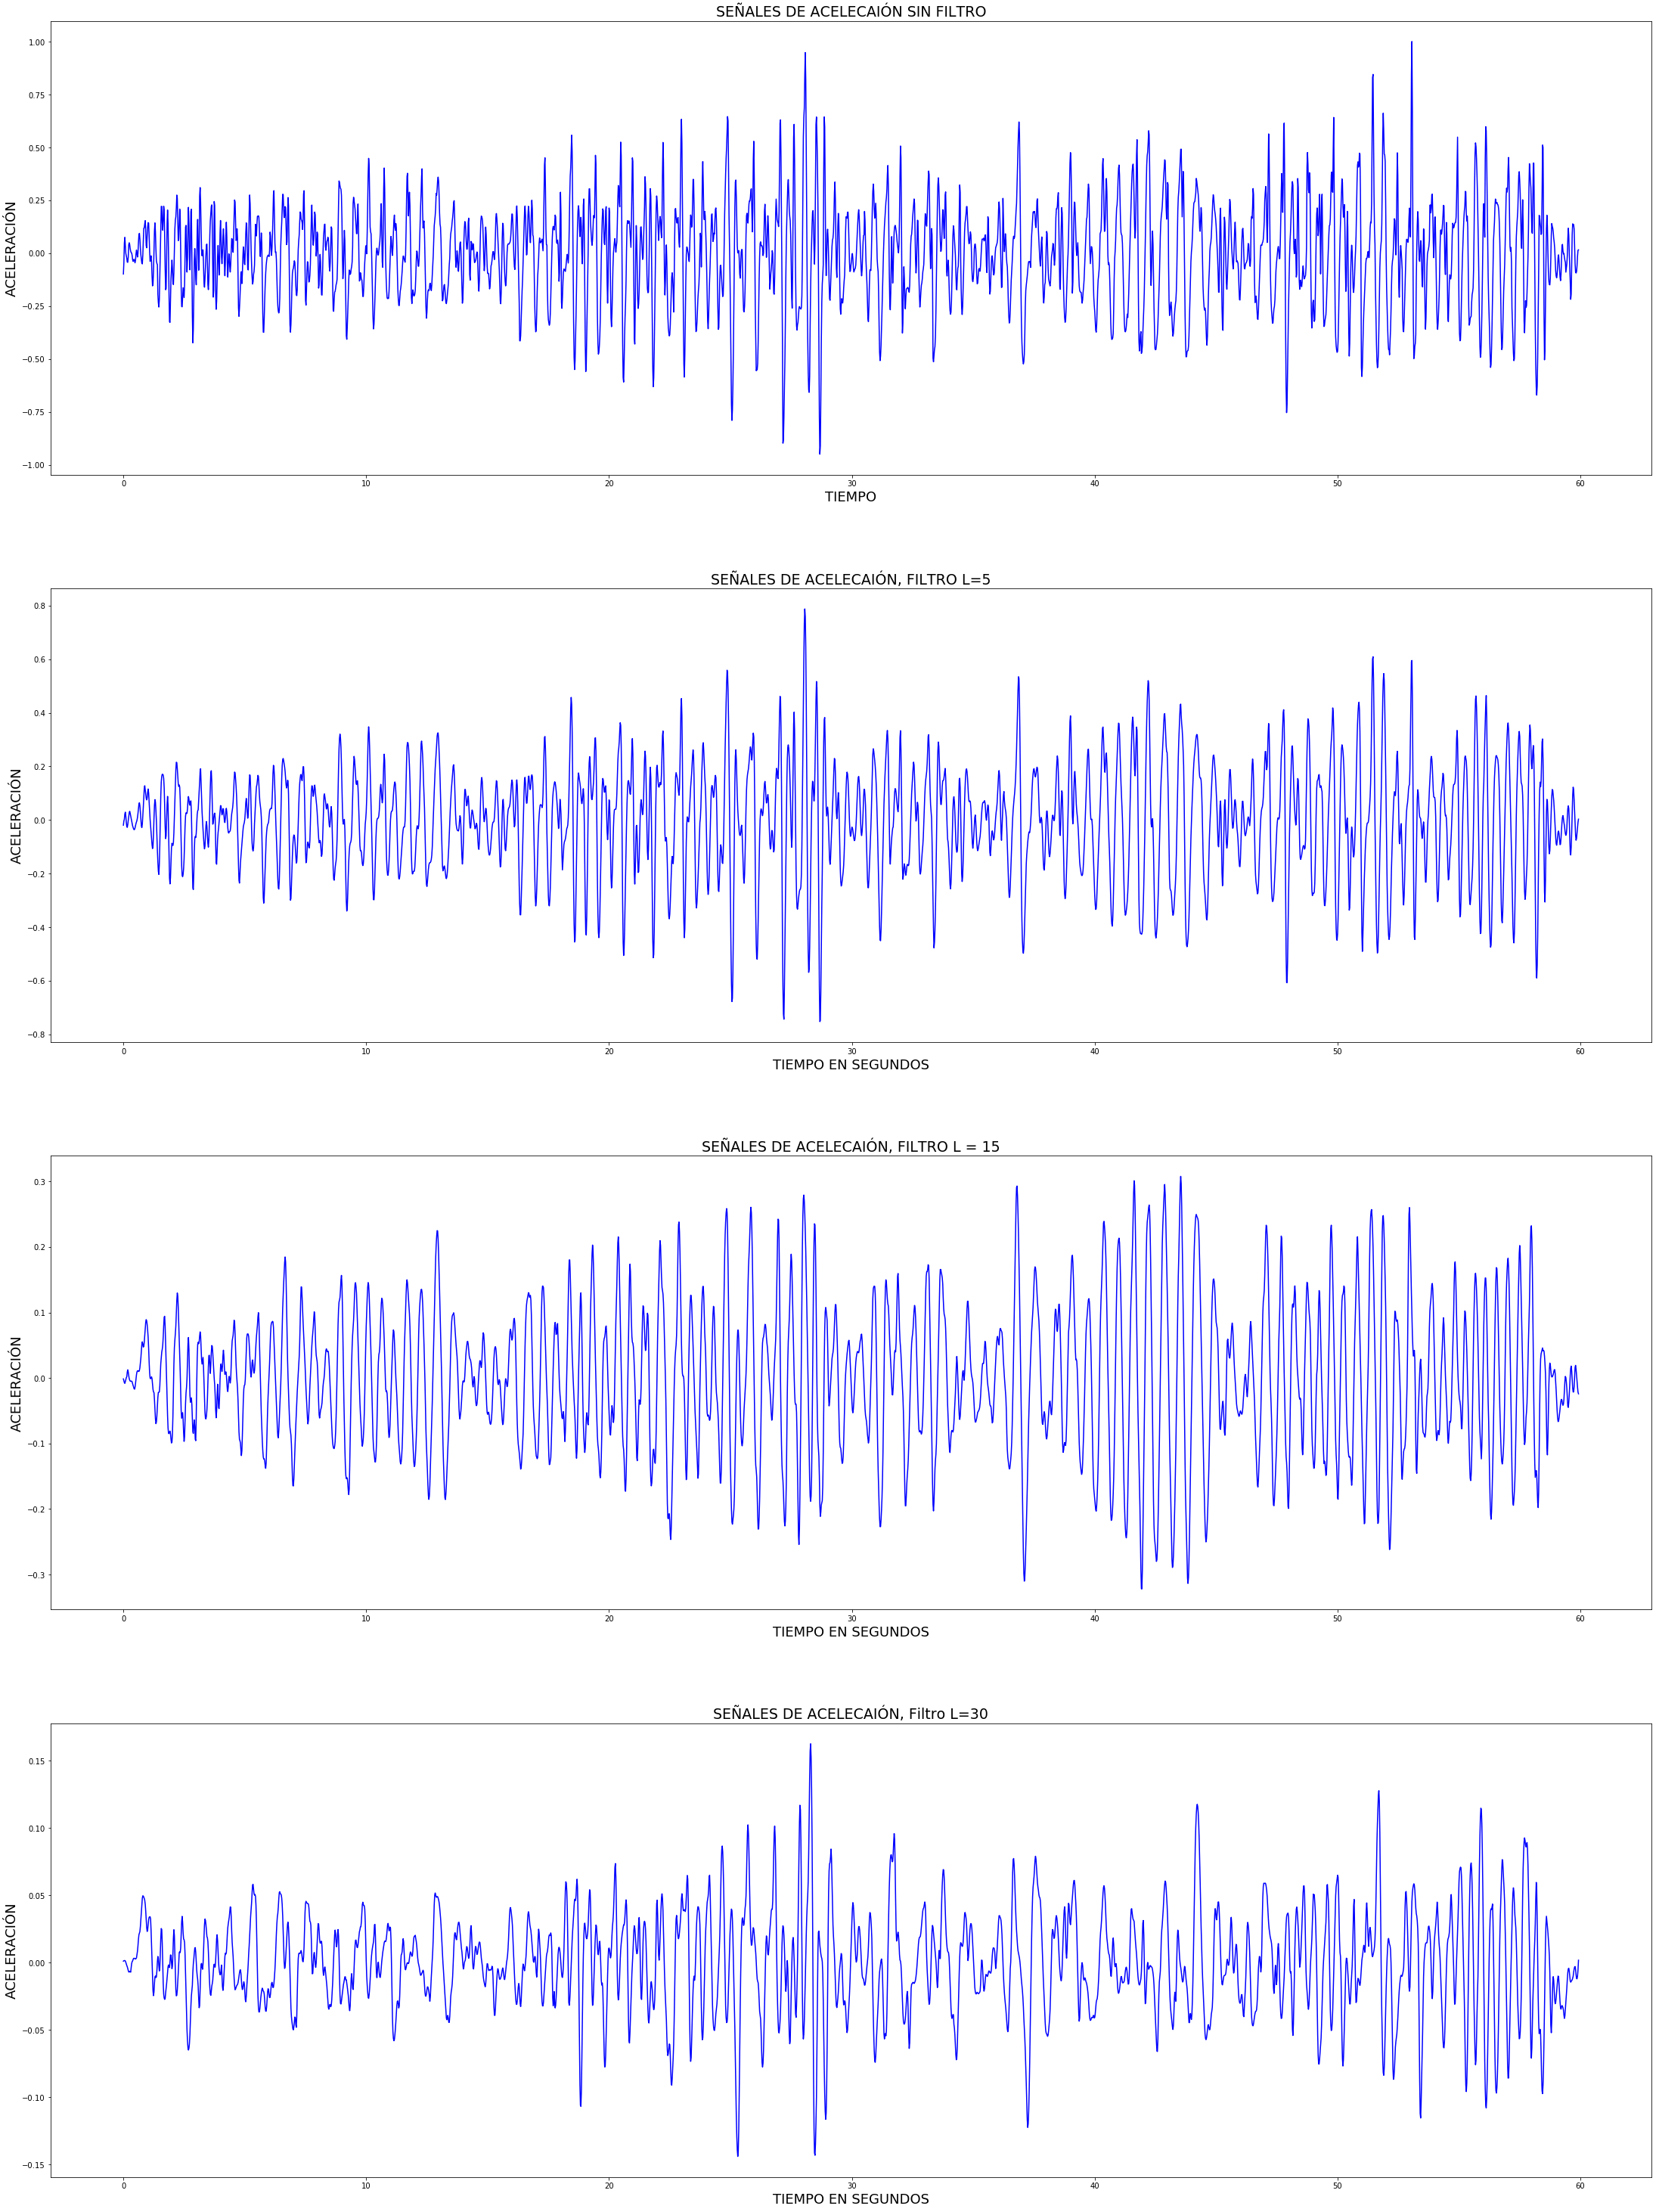

In [59]:
#8. Cargamos el archivo y extraemos la segunda columna de data
data = np.loadtxt('actividad2.txt') 
acelere_y = data[:,2]

#9. normalizamos la señal
media = np.mean(acelere_y)
norm = (acelere_y - media) / max(np.absolute(acelere_y))


#10. Aplicamos un filtro a la señal normalizada

#valores de filtros
L = 5
L_100 = 15
L_150 = 30


#Generamos los coeficientres del filtro
coefs=np.ones(L)/float(L)
coefs_100=np.ones(L_100)/float(L_100)
coefs_150=np.ones(L_150)/float(L_150)


#salida de convolución L=5, L=15, L=30
senal_smooth=np.convolve(norm, coefs, mode='same')
senal_smooth_100=np.convolve(norm, coefs_100, mode='same')
senal_smooth_150=np.convolve(norm, coefs_150, mode='same')


#Para representar el denominador, el numerador y la respuesta natural
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1

#frecuencia de muestreo y Vector de tiempo
Ts = 1/50
t = np.arange(0, float(len(norm))*Ts, Ts)  

print ("Graficamos varios filtros para comparar el comportamiento de la señal")

#11. Graficamos la señal normalizada y filtrada

#señal original
plt.subplot(4,1,1)
plt.plot(t, norm, 'b')
plt.xlabel('TIEMPO',fontsize=18)
plt.ylabel('ACELERACIÓN',fontsize=18)
plt.title('SEÑALES DE ACELECAIÓN SIN FILTRO', fontsize=19)


#graficamos L = 30
plt.subplot(4,1,2)
plt.plot(t, senal_smooth, 'b')
plt.xlabel('TIEMPO EN SEGUNDOS',fontsize=18)
plt.ylabel('ACELERACIÓN',fontsize=18)
plt.title('SEÑALES DE ACELECAIÓN, FILTRO L=5', fontsize=19)


#graficamos L = 100
plt.subplot(4,1,3)
plt.plot(t, senal_smooth_100, 'b')
plt.xlabel('TIEMPO EN SEGUNDOS',fontsize=18)
plt.ylabel('ACELERACIÓN',fontsize=18)
plt.title('SEÑALES DE ACELECAIÓN, FILTRO L = 15', fontsize=19)

#graficamos L = 150
plt.subplot(4,1,4)
plt.plot(t, senal_smooth_150, 'b')
plt.xlabel('TIEMPO EN SEGUNDOS',fontsize=18)
plt.ylabel('ACELERACIÓN',fontsize=18)
plt.title('SEÑALES DE ACELECAIÓN, Filtro L=30', fontsize=19)


plt.subplots_adjust(top=10, bottom=0.1, left=0.10, right=5, hspace=0.25, wspace=0.35)

Observación: Le restamos la media para quitar el efecto de la gravedad.

##### ¿Cómo es la señal?
La señal muestra cierta periodicidad cuando bajamos y subimos las escaleras; Tenemos mayor amplitud de la señal cuando nos estamos subiendo o bajando las escaleras, cuando parábamos para bajar o subir nuevamente las escaleras el movimiento era casi nulo y eso se representa en la señal.



#### 12. Obtenga la autocorrelación de la señal normalizada y filtrada y grafíquela.

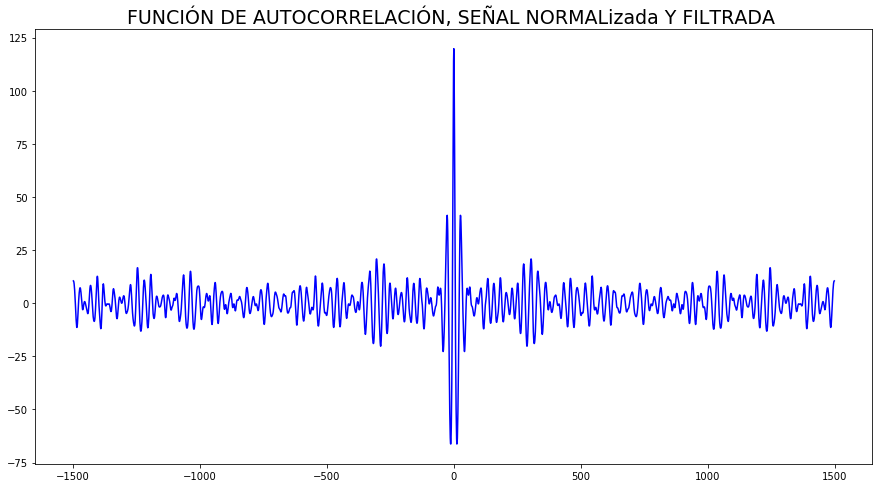

In [60]:
Rxx = np.correlate(senal_smooth, senal_smooth, mode='same')
tau=np.arange(-len(norm)/2,len(norm)/2,1) # vector de retras

#grafica señal autocorrelación
plt.figure(figsize=(15,8))
plt.plot(tau, Rxx, 'b')
plt.xlabel('',fontsize=18)
plt.ylabel('',fontsize=18)
plt.title('FUNCIÓN DE AUTOCORRELACIÓN, SEÑAL NORMALizada Y FILTRADA ', fontsize=19)
plt.show()

Observación: Cuando en la Rxx está en full la autocorrelación la hace con el doble de muestras en la señal, pero cuando tenemos same la señal de autocorrelación es prácticamente la misma que la señal original, por eso cuando vamos a hacer tau debemos dividir la señal sobre 2 para poder graficar, sino, tendremos problemas. 

##### ¿Cómo es la señal de autocorrelación?
Cuando normalizamos y filtramos la señal, y a esta le sacamos la autocorrelación se puede ver de forma más precisa donde es el pico máximo de la autocorrelación, y como ya habíamos dicho es en el tau=0 (no hay desfase)


##### 13.  Grafique la autocorrelación para 0< τ <5 s. A partir de esta gráfica determine valores mínimo y máximo de τ para encontrar el primer máximo de la autocorrelación. 

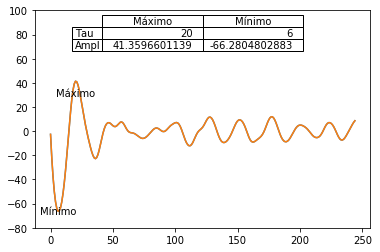

In [54]:
 fs  = 50
indices=np.where((tau<5*fs)&(tau>5))

#Maxios y minimos en la señal acotada
from scipy.optimize import fmin



#para poner max y min 
a =  Rxx[indices] # Creamos una serie de 10 valores pseudo-aleatorios entre 0 y 1
plt.plot(a)  # Los dibujamos
plt.ylim(-80, 100)  # Definimos el rango de valores para el eje y
plt.text(np.argmin(a), np.min(a) - 0.1, u'Mínimo', fontsize = 10, horizontalalignment='center', verticalalignment='center')  # Colocamos texto cerca del valor donde se encuentra el mínimo
plt.text(np.argmax(a), np.max(a) - 10.1, u'Máximo', fontsize = 10, horizontalalignment='center', verticalalignment='center')  # Colocamos texto cerca del valor donde se encuentra el máximo


valores = [[np.argmax(a), np.argmin(a)], [np.max(a), np.min(a)]]
etiquetas_fil = ('Tau', 'Ampl')
etiquetas_col = (u'Máximo', u'Mínimo')
plt.plot(a)
plt.table(cellText=valores, rowLabels=etiquetas_fil, colLabels = etiquetas_col, colWidths = [0.3]*len(a), loc='upper center')

##### 15.  Determine e indique el periodo de la señal a partir del tau para el primer máximo global de la autocorrelación después de cero.

observación: Por medio de los valores de tau máximo y tau mínimo podemos determinar el periodo de la señal.

In [62]:
indices2=np.where((tau<np.argmax(a)) & (tau>np.argmin(a)))
periodo=tau[np.where(Rxx==np.max(Rxx[indices2]))]

print ("El periodo de la señal a partir del tau máximo global es: ", periodo[1])

El periodo de la señal a partir del tau máximo global es:  19.5
